In [19]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [20]:
X,y = make_moons(n_samples = 250, noise = 0.05, random_state = 42)

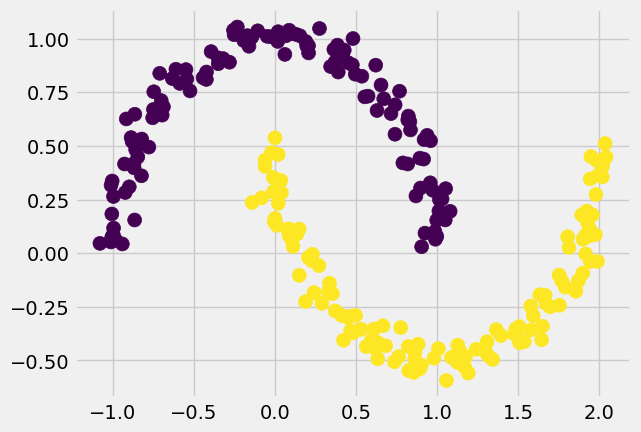

In [21]:
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.show()

In [22]:
y.shape

(250,)

In [23]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
# weight of first layer store in Old weight
old_weights = model.get_weights()[0]

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [27]:
model.fit(X_train,y_train,epochs=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.5280 - loss: 0.7306


In [28]:
# again store first layer weights in new weights
new_weights = model.get_weights()[0]

In [29]:
# learning rate -> default
model.optimizer.get_config()['learning_rate']

0.0010000000474974513

In [30]:
gradient = (old_weights - new_weights)/0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [31]:
gradient

array([[-0.00402331, -0.00587106, -0.01832843,  0.00810623, -0.0154376 ,
        -0.00542402, -0.00169873,  0.00721216, -0.01858175,  0.00524521],
       [ 0.00542402,  0.00819564,  0.02548098, -0.01302361,  0.02145767,
         0.00739098,  0.00220537, -0.01111627,  0.02652407, -0.00697374]],
      dtype=float32)

In [32]:
percent_change

array([[0.00215397, 0.00191263, 0.0134096 , 0.00178214, 0.02329269,
        0.00521674, 0.00083273, 0.00129165, 0.00863581, 0.00671173],
       [0.00084263, 0.00183693, 0.00624066, 0.0040416 , 0.00650786,
        0.00104811, 0.00067619, 0.00251941, 0.00612533, 0.00122308]],
      dtype=float32)

In [33]:
old_weights

array([[-0.18678623,  0.3069622 , -0.13668138, -0.4548599 ,  0.06627661,
         0.10397339,  0.20399493, -0.558368  ,  0.2151708 ,  0.07814986],
       [ 0.6437029 ,  0.4461599 ,  0.4083057 ,  0.32223898,  0.32971948,
        -0.70516855,  0.32614762, -0.44122523, -0.4330228 , -0.5701772 ]],
      dtype=float32)

In [34]:
new_weights

array([[-0.18678221,  0.30696806, -0.13666305, -0.45486802,  0.06629205,
         0.10397881,  0.20399663, -0.55837524,  0.21518938,  0.07814461],
       [ 0.6436975 ,  0.4461517 ,  0.40828022,  0.322252  ,  0.32969803,
        -0.70517594,  0.3261454 , -0.4412141 , -0.43304932, -0.5701702 ]],
      dtype=float32)

# **Detect Vanishing Problem**

In [35]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5221 - loss: 0.7256 
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5125 - loss: 0.7233 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4801 - loss: 0.7322 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4731 - loss: 0.7268 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4807 - loss: 0.7166 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5043 - loss: 0.7030 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4643 - loss: 0.7104 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4640 - loss: 0.7060 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4589 - loss: 0.7041 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5015 - loss: 0.6955 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4943 - loss: 0.6957 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5064 - los

**not reducing loss after 100 epochs . stuck at 0.69**

In [36]:
old_weights

array([[-0.18678623,  0.3069622 , -0.13668138, -0.4548599 ,  0.06627661,
         0.10397339,  0.20399493, -0.558368  ,  0.2151708 ,  0.07814986],
       [ 0.6437029 ,  0.4461599 ,  0.4083057 ,  0.32223898,  0.32971948,
        -0.70516855,  0.32614762, -0.44122523, -0.4330228 , -0.5701772 ]],
      dtype=float32)

In [38]:
new_weights = model.get_weights()[0]

In [39]:
new_weights

array([[-0.17591183,  0.30561906, -0.10997488, -0.5057261 ,  0.12001154,
         0.11218389,  0.20594077, -0.575868  ,  0.2771297 ,  0.04885604],
       [ 0.6352403 ,  0.44701526,  0.38698867,  0.3672785 ,  0.28694528,
        -0.71168834,  0.32502535, -0.42530122, -0.48320985, -0.54804695]],
      dtype=float32)

**very small change in new weights**